Use time-series analysis techniques such as ARIMA or GARCH to model and forecast future stock prices.

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

[*********************100%%**********************]  1 of 1 completed


/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


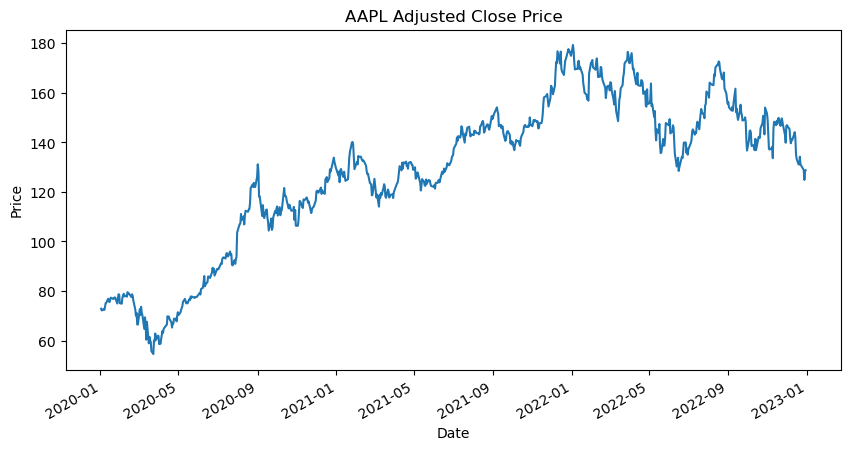

In [10]:
# Step 1: Load stock data (e.g., for 'AAPL')
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
stock_data['Adj Close'].plot(figsize=(10, 5))
plt.title('AAPL Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
# Step 2: Check for stationarity
result = adfuller(stock_data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8889086007447242
p-value: 0.33729670950496315


In [12]:
# Step 3: Differencing if necessary
if result[1] > 0.05:
    stock_data['Adj Close Diff'] = stock_data['Adj Close'].diff().dropna()
    stock_data = stock_data.dropna()

In [13]:
# Step 4: Fit ARIMA model (p, d, q)
model = ARIMA(stock_data['Adj Close'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  755
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1829.853
Date:                Mon, 04 Nov 2024   AIC                           3665.706
Time:                        16:26:21   BIC                           3679.582
Sample:                             0   HQIC                          3671.052
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3940      0.372      1.059      0.289      -0.335       1.123
ma.L1         -0.4586      0.363     -1.262      0.207      -1.171       0.253
sigma2         7.5065      0.301     24.900      0.0

/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
# Step 5: Forecast future prices
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1),periods=10)
forecast_series = pd.Series(forecast, index=forecast_index)
forecast_series

/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


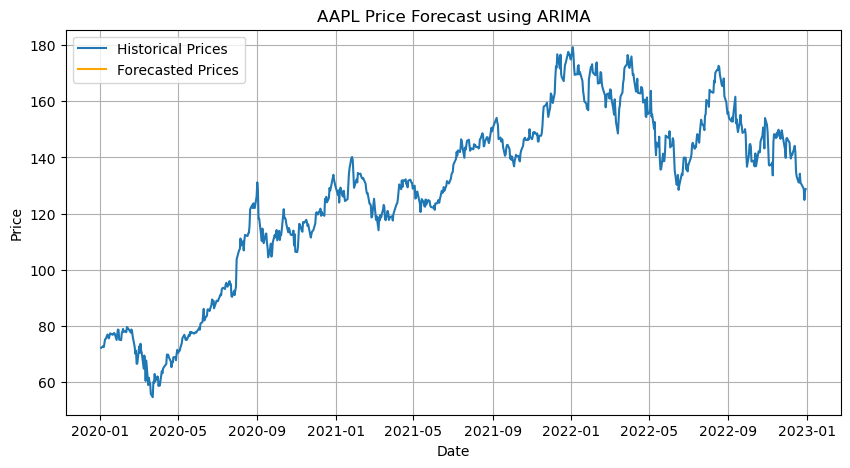

In [15]:
# Step 6: Plot the results
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Adj Close'], label='Historical Prices')
plt.plot(forecast_series, label='Forecasted Prices', color='orange')
plt.title('AAPL Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()